My implementation of training on MNIST full dataset on Dense (plain) neural network using keras library  
Please do note that some values are hard-coded for ease in this simple implementation  
Accuracy achieved : 92%  
Reference to www.pyimagesearch.com

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Loading MNIST full dataset...")
dataset = fetch_openml("mnist_784")

data = dataset.data.astype("float")/255.0
train_X, test_X, train_Y, test_Y = train_test_split(data, dataset.target, test_size = 0.25)
print("Training set shapes : {} {}".format(train_X.shape,train_Y.shape))
print("Test set shapes : {} {}".format(test_X.shape, test_Y.shape))

Loading MNIST full dataset...
Training set shapes : (52500, 784) (52500,)
Test set shapes : (17500, 784) (17500,)


In [3]:
lb = LabelBinarizer()     #one-hot encoding
train_Y = lb.fit_transform(train_Y)
test_Y = lb.fit_transform(test_Y)

In [5]:
model = Sequential()      #defining our model
model.add(Dense(256, input_shape = (train_X.shape[1],), activation = "sigmoid"))
model.add(Dense(128, activation= "sigmoid"))
model.add(Dense(10, activation = "softmax"))

In [6]:
print("Training neural network...")
sgd = SGD(learning_rate=1e-2)
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])
History = model.fit(train_X, train_Y, validation_data = (test_X, test_Y), epochs = 100, batch_size = 128)

Training neural network...
Epoch 1/100
411/411 [==============================] - 2s 4ms/step - loss: 2.2890 - accuracy: 0.1765 - val_loss: 2.2571 - val_accuracy: 0.2461
Epoch 2/100
411/411 [==============================] - 1s 3ms/step - loss: 2.2291 - accuracy: 0.3447 - val_loss: 2.2013 - val_accuracy: 0.4093
Epoch 3/100
411/411 [==============================] - 1s 3ms/step - loss: 2.1637 - accuracy: 0.4700 - val_loss: 2.1250 - val_accuracy: 0.4741
Epoch 4/100
411/411 [==============================] - 1s 3ms/step - loss: 2.0755 - accuracy: 0.5589 - val_loss: 2.0228 - val_accuracy: 0.5221
Epoch 5/100
411/411 [==============================] - 1s 3ms/step - loss: 1.9525 - accuracy: 0.6036 - val_loss: 1.8785 - val_accuracy: 0.6166
Epoch 6/100
411/411 [==============================] - 1s 3ms/step - loss: 1.7903 - accuracy: 0.6450 - val_loss: 1.6990 - val_accuracy: 0.6649
Epoch 7/100
411/411 [==============================] - 1s 3ms/step - loss: 1.6003 - accuracy: 0.6808 - val_loss: 1.

In [12]:
print("Predicting on the trained network...")
preds = model.predict(test_X, batch_size = 128)
preds = preds.argmax(axis = 1)
print(classification_report(test_Y.argmax(axis = 1), preds, target_names= [str(x) for x in lb.classes_]))

Predicting on the trained network...
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1692
           1       0.94      0.97      0.96      1979
           2       0.91      0.89      0.90      1682
           3       0.91      0.88      0.89      1742
           4       0.90      0.93      0.92      1718
           5       0.88      0.86      0.87      1593
           6       0.93      0.95      0.94      1686
           7       0.93      0.93      0.93      1859
           8       0.91      0.88      0.90      1789
           9       0.89      0.89      0.89      1760

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



To achieve better accuracy, we can try tuning the hyperparameters or more importantly, we should try to use a Convolutional Neural Network for such image classification tasks

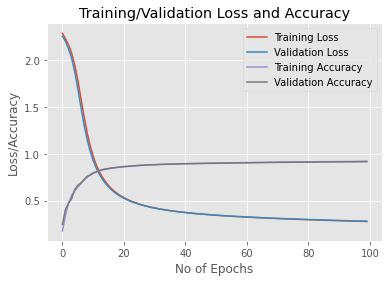

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), History.history["loss"], label = "Training Loss")
plt.plot(np.arange(0,100), History.history["val_loss"], label = "Validation Loss")
plt.plot(np.arange(0,100), History.history["accuracy"], label = "Training Accuracy")
plt.plot(np.arange(0,100), History.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training/Validation Loss and Accuracy")
plt.legend()
plt.xlabel("No of Epochs")
plt.ylabel("Loss/Accuracy")
plt.show()